In [1]:
# 载入数据
import pickle

with open('data.pkl','rb') as file:
    data = pickle.load(file)
data

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0          DEBIT                         3                              4   
1       TRANSFER                         5                              4   
2           CASH                         4                              4   
3          DEBIT                         3                              4   
4        PAYMENT                         2                              4   
5       TRANSFER                         6                              4   
6          DEBIT                         2                              1   
7       TRANSFER                         2                              1   
8           CASH                         3                              2   
9           CASH                         2                              1   
10      TRANSFER                         6                              2   
11      TRANSFER                         5                              2   
12      TRANSFER                         4                              2   
13         DEBIT                         2                              1   
14      TRANSFER                         2                              1   
15         DEBIT                         2                              1   
16       PAYMENT                         5                              2   
17          CASH                         2                              1   
18         DEBIT                         2                              1   
19       PAYMENT                         0                              0   
20      TRANSFER                         0                              0   
21      TRANSFER                         5                              4   
22      TRANSFER                         4                              2   
23      TRANSFER                         3                              2   
24      TRANSFER                         2                              2   
25         DEBIT                         6                              2   
26      TRANSFER                         5                              2   
27       PAYMENT                         4                              4   
28         DEBIT                         3                              4   
29      TRANSFER                         2                              4   
...          ...                       ...                            ...   
180489   PAYMENT                         6                              4   
180490  TRANSFER                         4                              4   
180491  TRANSFER                         3                              4   
180492     DEBIT                         2                              4   
180493     DEBIT                         2                              4   
180494     DEBIT                         2                              4   
180495   PAYMENT                         3                              4   
180496      CASH                         2                              4   
180497     DEBIT                         3                              4   
180498      CASH                         3                              4   
180499     DEBIT                         4                              2   
180500     DEBIT                         3                              4   
180501   PAYMENT                         2                              4   
180502   PAYMENT                         2                              4   
180503   PAYMENT                         2                              4   
180504      CASH                         3                              4   
180505     DEBIT                         2                              4   
180506   PAYMENT                         2                              1   
180507   PAYMENT                         5                              2   
180508     DEBIT                         4                              2   
180509  

In [2]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [3]:
data['Order Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

In [4]:
# modeling 对欺诈订单进行预测 =>二分类任务
# modeling 对延迟发货进行预测 =>二分类任务
# 构造预测label
import numpy as np

data['Order Status'].value_counts()
data['fraud'] = np.where(data['Order Status'] == 'SUSPECTED_FRAUD',1,0)

data['Delivery Status'].value_counts()
data['late_delivery'] =  np.where(data['Delivery Status'] == 'Late delivery',1,0)

In [5]:
data['fraud'].value_counts()

0    176457
1      4062
Name: fraud, dtype: int64

In [6]:
# 数据清洗
# 去掉无关列：Product Image,Customer Email,Customer Password,Customer Fname
data.drop(['Product Image','Customer Email','Customer Password','Customer Fname'],axis = 1,inplace = True)

In [7]:
# 去掉标签相关列
data.drop(['Order Status','Delivery Status'],axis=1,inplace = True)

In [8]:
# 查看数据
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 56 columns):
Type                             180519 non-null object
Days for shipping (real)         180519 non-null int64
Days for shipment (scheduled)    180519 non-null int64
Benefit per order                180519 non-null float64
Sales per customer               180519 non-null float64
Late_delivery_risk               180519 non-null int64
Category Id                      180519 non-null int64
Category Name                    180519 non-null object
Customer City                    180519 non-null object
Customer Country                 180519 non-null object
Customer Id                      180519 non-null int64
Customer Lname                   180511 non-null object
Customer Segment                 180519 non-null object
Customer State                   180519 non-null object
Customer Street                  180519 non-null object
Customer Zipcode                 180519 non-null flo

In [9]:
# 查看各字段取值情况
for column in data.columns:
    temp = data[column].value_counts()
    print(column,len(temp))

Type 4
Days for shipping (real) 7
Days for shipment (scheduled) 4
Benefit per order 21998
Sales per customer 2927
Late_delivery_risk 2
Category Id 51
Category Name 50
Customer City 563
Customer Country 2
Customer Id 20652
Customer Lname 1109
Customer Segment 3
Customer State 46
Customer Street 7458
Customer Zipcode 996
Department Id 11
Department Name 11
Latitude 11250
Longitude 4487
Market 5
Order City 3597
Order Country 164
Order Customer Id 20652
order date (DateOrders) 65752
Order Id 65752
Order Item Cardprod Id 118
Order Item Discount 1017
Order Item Discount Rate 18
Order Item Id 180519
Order Item Product Price 75
Order Item Profit Ratio 162
Order Item Quantity 5
Sales 193
Order Item Total 2927
Order Profit Per Order 21998
Order Region 23
Order State 1089
Order Zipcode 609
Product Card Id 118
Product Category Id 51
Product Description 0
Product Name 118
Product Price 75
Product Status 1
shipping date (DateOrders) 63701
Shipping Mode 4
Customer Full Name 14025
order_year 4
order_m

In [10]:
# 去掉无关列Product Description,Order Item Id ,Latitude ,Longitude,Product Status,Customer Street,Order Zipcode,order date(DateOrders)
data.drop(['Product Description','Order Item Id','Latitude','Longitude','Product Status','Customer Street',
           'shipping date (DateOrders)','Order Zipcode','order date (DateOrders)','order_month_year'],axis = 1,inplace = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 46 columns):
Type                             180519 non-null object
Days for shipping (real)         180519 non-null int64
Days for shipment (scheduled)    180519 non-null int64
Benefit per order                180519 non-null float64
Sales per customer               180519 non-null float64
Late_delivery_risk               180519 non-null int64
Category Id                      180519 non-null int64
Category Name                    180519 non-null object
Customer City                    180519 non-null object
Customer Country                 180519 non-null object
Customer Id                      180519 non-null int64
Customer Lname                   180511 non-null object
Customer Segment                 180519 non-null object
Customer State                   180519 non-null object
Customer Zipcode                 180519 non-null float64
Department Id                    180519 non-null in

In [12]:
data['Customer Country'].value_counts()

EE. UU.        111146
Puerto Rico     69373
Name: Customer Country, dtype: int64

In [13]:
# 查看变量类型（分类）
categorical_cols = data.select_dtypes(include = 'object').columns
categorical_cols
numerical_cols = data.select_dtypes(exclude ='object').columns
numerical_cols

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id',
       'Order Customer Id', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Product Card Id', 'Product Category Id',
       'Product Price', 'order_year', 'order_month', 'order_week_day',
       'order_hour', 'Total Price', 'fraud', 'late_delivery'],
      dtype='object')

In [14]:
data['Customer Lname'] = data['Customer Lname'].astype('str')
data['Customer Full Name'] = data['Customer Full Name'].astype('str')

In [15]:
# 使用labelencode进行编码
from sklearn.preprocessing import LabelEncoder,StandardScaler

le = LabelEncoder()
for column in categorical_cols:
    print(column)
    data[column] = le.fit_transform(data[column])
data

Type
Category Name
Customer City
Customer Country
Customer Lname
Customer Segment
Customer State
Department Name
Market
Order City
Order Country
Order Region
Order State
Product Name
Shipping Mode
Customer Full Name


Type  Days for shipping (real)  Days for shipment (scheduled)  \
0          1                         3                              4   
1          3                         5                              4   
2          0                         4                              4   
3          1                         3                              4   
4          2                         2                              4   
5          3                         6                              4   
6          1                         2                              1   
7          3                         2                              1   
8          0                         3                              2   
9          0                         2                              1   
10         3                         6                              2   
11         3                         5                              2   
12         3                         4                              2   
13         1                         2                              1   
14         3                         2                              1   
15         1                         2                              1   
16         2                         5                              2   
17         0                         2                              1   
18         1                         2                              1   
19         2                         0                              0   
20         3                         0                              0   
21         3                         5                              4   
22         3                         4                              2   
23         3                         3                              2   
24         3                         2                              2   
25         1                         6                              2   
26         3                         5                              2   
27         2                         4                              4   
28         1                         3                              4   
29         3                         2                              4   
...      ...                       ...                            ...   
180489     2                         6                              4   
180490     3                         4                              4   
180491     3                         3                              4   
180492     1                         2                              4   
180493     1                         2                              4   
180494     1                         2                              4   
180495     2                         3                              4   
180496     0                         2                              4   
180497     1                         3                              4   
180498     0                         3                              4   
180499     1                         4                              2   
180500     1                         3                              4   
180501     2                         2                              4   
180502     2                         2                              4   
180503     2                         2                              4   
180504     0                         3                              4   
180505     1                         2                              4   
180506     2                         2                              1   
180507     2                         5                              2   
180508     1                         4                              2   
180509     2                         3                              4   
180510     2                         3                              4   
180511     1                         2                            

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 46 columns):
Type                             180519 non-null int32
Days for shipping (real)         180519 non-null int64
Days for shipment (scheduled)    180519 non-null int64
Benefit per order                180519 non-null float64
Sales per customer               180519 non-null float64
Late_delivery_risk               180519 non-null int64
Category Id                      180519 non-null int64
Category Name                    180519 non-null int32
Customer City                    180519 non-null int32
Customer Country                 180519 non-null int32
Customer Id                      180519 non-null int64
Customer Lname                   180519 non-null int32
Customer Segment                 180519 non-null int32
Customer State                   180519 non-null int32
Customer Zipcode                 180519 non-null float64
Department Id                    180519 non-null int64
Dep

In [17]:
# 查看数值类型特征热力图
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,10))
temp = data[numerical_cols]
sns.heatmap(temp.corr(),annot = True,cmap = 'coolwarm',fmt ='.1g',linewidth =.5)
plt.show()

<Figure size 2000x1000 with 2 Axes>

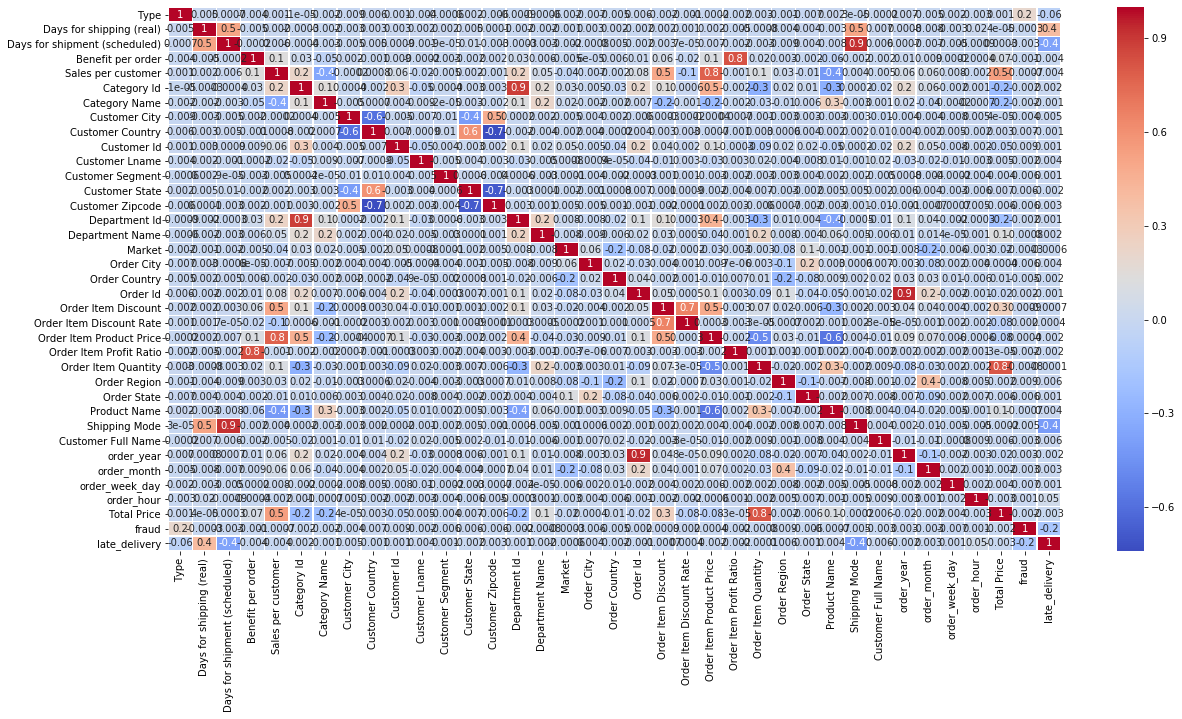

In [18]:
# 去掉重复字段Order Customer Id,Order Item Cardprod Id,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,
# Product Price,Late_delivery_risk
data.drop(['Order Customer Id','Order Item Cardprod Id','Sales','Order Item Total','Order Profit Per Order','Product Card Id',
          'Product Category Id','Product Price','Late_delivery_risk'],axis = 1,inplace = True)
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot =True,cmap ='coolwarm',fmt ='.1g',linewidth = .5)
plt.show()

In [19]:
# 切分数据集
from sklearn.model_selection import train_test_split

# 切分数据集预测是否为fraud
x_fraud = data.loc[:,data.columns != 'fraud']
y_fraud = data['fraud']
x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test = train_test_split(x_fraud,y_fraud,test_size = 0.2)
# 切分数据集预测是否late delivery
x_late = data.loc[:,data.columns != 'late_delivery']
y_late = data['late_delivery']
x_late_train,x_late_test,y_late_train,y_late_test = train_test_split(x_late,y_late,test_size = 0.2)

In [20]:
#数据规范化
sc = StandardScaler()
x_fraud_train = sc.fit_transform(x_fraud_train)
x_fraud_test = sc.transform(x_fraud_test)
x_late_train = sc.fit_transform(x_late_train)
x_late_test = sc.transform(x_late_test)

In [21]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,confusion_matrix

# 对fraud,late_delivery完成训练评估
def model_stats(model,x_train,x_test,y_train,y_test,name = 'fraud'):
    model = model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    confusion = confusion_matrix(y_test,y_pred)
    print('Model used:',model)
    print('{} accuracy:{}%'.format(name,accuracy*100))
    print('{} recall:{}%'.format(name,recall*100))
    print('{} f1:{}%'.format(name,f1*100))
    print('{} Confusion Matrix:\n{}'.format(name,confusion))
    return accuracy,recall,f1

In [22]:
# 建模
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

fraud_stats = {}
late_stats = {}
# 线性模型
model_fraud = LogisticRegression()
model_late = LogisticRegression()
# 模型训练与评估
fraud_stat = model_stats(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,name = 'fraud')
fraud_stats[model_fraud] = fraud_stat
print(fraud_stats)
late_stat = model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,name = 'late delivery')
late_stats[model_late] = late_stat
print(late_stats)

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model used: LogisticRegression()
fraud accuracy:97.75648127631288%
fraud recall:21.337946943483278%
fraud f1:31.35593220338983%
fraud Confusion Matrix:
[[35109   128]
 [  682   185]]
{LogisticRegression(): (0.9775648127631288, 0.21337946943483277, 0.3135593220338983)}
Model used: LogisticRegression()
late delivery accuracy:98.87547086195435%
late delivery recall:100.0%
late delivery f1:98.97738149211627%
late delivery Confusion Matrix:
[[16050   406]
 [    0 19648]]
{LogisticRegression(): (0.9887547086195435, 1.0, 0.9897738149211627)}


C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
# 高斯朴素贝叶斯模型
model_fraud = GaussianNB()
model_late = GaussianNB()
# 模型训练与评估
fraud_stat = model_stats(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,name = 'fraud')
fraud_stats[model_fraud] = fraud_stat
print(fraud_stats)
late_stat = model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,name = 'late delivery')
late_stats[model_late] = late_stat
print(late_stats)

Model used: GaussianNB()
fraud accuracy:88.12596942167073%
fraud recall:100.0%
fraud f1:28.79920279023418%
fraud Confusion Matrix:
[[30950  4287]
 [    0   867]]
{LogisticRegression(): (0.9775648127631288, 0.21337946943483277, 0.3135593220338983), GaussianNB(): (0.8812596942167072, 1.0, 0.2879920279023418)}
Model used: GaussianNB()
late delivery accuracy:56.65854198980722%
late delivery recall:100.0%
late delivery f1:71.52009318578916%
late delivery Confusion Matrix:
[[  808 15648]
 [    0 19648]]
{LogisticRegression(): (0.9887547086195435, 1.0, 0.9897738149211627), GaussianNB(): (0.5665854198980722, 1.0, 0.7152009318578917)}


In [24]:
# SVM模型
model_fraud = LinearSVC()
model_late = LinearSVC()
# 模型训练与评估
fraud_stat = model_stats(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,name = 'fraud')
fraud_stats[model_fraud] = fraud_stat
print(fraud_stats)
late_stat = model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,name = 'late delivery')
late_stats[model_late] = late_stat
print(late_stats)

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Model used: LinearSVC()
fraud accuracy:97.69554619986705%
fraud recall:16.608996539792386%
fraud f1:25.71428571428571%
fraud Confusion Matrix:
[[35128   109]
 [  723   144]]
{LogisticRegression(): (0.9775648127631288, 0.21337946943483277, 0.3135593220338983), GaussianNB(): (0.8812596942167072, 1.0, 0.2879920279023418), LinearSVC(): (0.9769554619986706, 0.16608996539792387, 0.2571428571428571)}
Model used: LinearSVC()
late delivery accuracy:98.87547086195435%
late delivery recall:100.0%
late delivery f1:98.97738149211627%
late delivery Confusion Matrix:
[[16050   406]
 [    0 19648]]
{LogisticRegression(): (0.9887547086195435, 1.0, 0.9897738149211627), GaussianNB(): (0.5665854198980722, 1.0, 0.7152009318578917), LinearSVC(): (0.9887547086195435, 1.0, 0.9897738149211627)}


C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [25]:
# KNN模型
model_fraud = KNeighborsClassifier()
model_late = KNeighborsClassifier()
# 模型训练与评估
fraud_stat = model_stats(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,name = 'fraud')
fraud_stats[model_fraud] = fraud_stat
print(fraud_stats)
late_stat = model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,name = 'late delivery')
late_stats[model_late] = late_stat
print(late_stats)

Model used: KNeighborsClassifier()
fraud accuracy:97.75648127631288%
fraud recall:9.111880046136102%
fraud f1:16.32231404958678%
fraud Confusion Matrix:
[[35215    22]
 [  788    79]]
{LogisticRegression(): (0.9775648127631288, 0.21337946943483277, 0.3135593220338983), GaussianNB(): (0.8812596942167072, 1.0, 0.2879920279023418), LinearSVC(): (0.9769554619986706, 0.16608996539792387, 0.2571428571428571), KNeighborsClassifier(): (0.9775648127631288, 0.09111880046136102, 0.16322314049586778)}
Model used: KNeighborsClassifier()
late delivery accuracy:85.48083314868158%
late delivery recall:86.8332654723127%
late delivery f1:86.68326389594553%
late delivery Confusion Matrix:
[[13801  2655]
 [ 2587 17061]]
{LogisticRegression(): (0.9887547086195435, 1.0, 0.9897738149211627), GaussianNB(): (0.5665854198980722, 1.0, 0.7152009318578917), LinearSVC(): (0.9887547086195435, 1.0, 0.9897738149211627), KNeighborsClassifier(): (0.8548083314868159, 0.868332654723127, 0.8668326389594553)}


In [26]:
# linear discriminant analysis模型
model_fraud = LinearDiscriminantAnalysis()
model_late = LinearDiscriminantAnalysis()
# 模型训练与评估
fraud_stat = model_stats(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,name = 'fraud')
fraud_stats[model_fraud] = fraud_stat
print(fraud_stats)
late_stat = model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,name = 'late delivery')
late_stats[model_late] = late_stat
print(late_stats)

Model used: LinearDiscriminantAnalysis()
fraud accuracy:97.8478838909816%
fraud recall:41.17647058823529%
fraud f1:47.88732394366197%
fraud Confusion Matrix:
[[34970   267]
 [  510   357]]
{LogisticRegression(): (0.9775648127631288, 0.21337946943483277, 0.3135593220338983), GaussianNB(): (0.8812596942167072, 1.0, 0.2879920279023418), LinearSVC(): (0.9769554619986706, 0.16608996539792387, 0.2571428571428571), KNeighborsClassifier(): (0.9775648127631288, 0.09111880046136102, 0.16322314049586778), LinearDiscriminantAnalysis(): (0.9784788389098161, 0.4117647058823529, 0.4788732394366197)}
Model used: LinearDiscriminantAnalysis()
late delivery accuracy:98.46554398404609%
late delivery recall:99.47068403908796%
late delivery f1:98.60249230613995%
late delivery Confusion Matrix:
[[16006   450]
 [  104 19544]]
{LogisticRegression(): (0.9887547086195435, 1.0, 0.9897738149211627), GaussianNB(): (0.5665854198980722, 1.0, 0.7152009318578917), LinearSVC(): (0.9887547086195435, 1.0, 0.98977381492116

In [27]:
# 决策树模型
model_fraud = DecisionTreeClassifier()
model_late = DecisionTreeClassifier()
# 模型训练与评估
fraud_stat = model_stats(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,name = 'fraud')
fraud_stats[model_fraud] = fraud_stat
print(fraud_stats)
late_stat = model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,name = 'late delivery')
late_stats[model_late] = late_stat
print(late_stats)

Model used: DecisionTreeClassifier()
fraud accuracy:99.13582982495014%
fraud recall:82.81430219146482%
fraud f1:82.15102974828376%
fraud Confusion Matrix:
[[35074   163]
 [  149   718]]
{LogisticRegression(): (0.9775648127631288, 0.21337946943483277, 0.3135593220338983), GaussianNB(): (0.8812596942167072, 1.0, 0.2879920279023418), LinearSVC(): (0.9769554619986706, 0.16608996539792387, 0.2571428571428571), KNeighborsClassifier(): (0.9775648127631288, 0.09111880046136102, 0.16322314049586778), LinearDiscriminantAnalysis(): (0.9784788389098161, 0.4117647058823529, 0.4788732394366197), DecisionTreeClassifier(): (0.9913582982495014, 0.8281430219146482, 0.8215102974828375)}
Model used: DecisionTreeClassifier()
late delivery accuracy:99.30755594947928%
late delivery recall:99.28236970684038%
late delivery f1:99.36328443357783%
late delivery Confusion Matrix:
[[16347   109]
 [  141 19507]]
{LogisticRegression(): (0.9887547086195435, 1.0, 0.9897738149211627), GaussianNB(): (0.5665854198980722, 

In [28]:
# 随机森林模型
model_fraud = RandomForestClassifier()
model_late = RandomForestClassifier()
# 模型训练与评估
fraud_stat = model_stats(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,name = 'fraud')
fraud_stats['RandomForestClassifier()'] = fraud_stat
print(fraud_stats)
late_stat = model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,name = 'late delivery')
late_stats['RandomForestClassifier()'] = late_stat
print(late_stats)

Model used: RandomForestClassifier()
fraud accuracy:98.92255705738975%
fraud recall:56.516724336793544%
fraud f1:71.58509861212565%
fraud Confusion Matrix:
[[35225    12]
 [  377   490]]
{LogisticRegression(): (0.9775648127631288, 0.21337946943483277, 0.3135593220338983), GaussianNB(): (0.8812596942167072, 1.0, 0.2879920279023418), LinearSVC(): (0.9769554619986706, 0.16608996539792387, 0.2571428571428571), KNeighborsClassifier(): (0.9775648127631288, 0.09111880046136102, 0.16322314049586778), LinearDiscriminantAnalysis(): (0.9784788389098161, 0.4117647058823529, 0.4788732394366197), DecisionTreeClassifier(): (0.9913582982495014, 0.8281430219146482, 0.8215102974828375), 'RandomForestClassifier()': (0.9892255705738976, 0.5651672433679354, 0.7158509861212564)}
Model used: RandomForestClassifier()
late delivery accuracy:99.26323953024595%
late delivery recall:100.0%
late delivery f1:99.32763763207119%
late delivery Confusion Matrix:
[[16190   266]
 [    0 19648]]
{LogisticRegression(): (0.

In [29]:
# xgboost模型
from xgboost import XGBClassifier

model_fraud = XGBClassifier()
model_late = XGBClassifier()
# 模型训练与评估
fraud_stat = model_stats(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,name = 'fraud')
fraud_stats[' XGBClassifier()'] = fraud_stat
print(fraud_stats)
late_stat = model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,name = 'late delivery')
late_stats[' XGBClassifier()'] = late_stat
print(late_stats)

Model used: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
fraud accuracy:98.98626191003767%
fraud recall:62.745098039215684%
fraud f1:74.828060522696%
fraud Confusion Matrix:
[[35194    43]
 [  323   544]]
{LogisticRegression(): (0.9775648127631288, 0.21337946943483277, 0.3135593220338983), GaussianNB(): (0.8812596942167072, 1.0, 0.2879920279023418), LinearSVC(): (0.9769554619986706, 0.16608996539792387, 0.2571428571428571), KNeighborsClassifier(): (0.97756481

In [30]:
import pandas as pd
# 得到fraud的最佳预测模型
df_fraud_stats = pd.DataFrame.from_dict(fraud_stats,orient = 'index',columns = ['accuracy','recall','f1'])
df_fraud_stats['model'] = df_fraud_stats.index
df_fraud_stats
# # 取f1值作为模型评价指标
best_model = df_fraud_stats.sort_values(by = 'f1',ascending = False)['model'].iloc[0]
print('fraud预测模型f1值最优的为',best_model)

fraud预测模型f1值最优的为 DecisionTreeClassifier()


In [31]:
# 决策树模型
best_model_fraud = DecisionTreeClassifier()
best_model_fraud.fit(x_fraud_train,y_fraud_train)

DecisionTreeClassifier()

In [32]:
# 根据决策树模型，得到feature_importance
fraud_important_col = best_model_fraud.feature_importances_.argsort()
print(fraud_important_col)

[24 30  8 14  6 15 22 21 20 27  4  5 34  3 23  2 11 16 12 25 32 18 31  7
 13 26 33 17 28 29  0  9 10 19 35  1]


                        Variables  importance
0             Order Item Quantity    0.000883
1                      order_year    0.001321
2                Customer Country    0.001516
3                   Department Id    0.001517
4                   Category Name    0.002980
5                 Department Name    0.003034
6        Order Item Product Price    0.003160
7        Order Item Discount Rate    0.003222
8             Order Item Discount    0.004288
9                    Product Name    0.004469
10             Sales per customer    0.005245
11                    Category Id    0.005966
12                    Total Price    0.006252
13              Benefit per order    0.007569
14        Order Item Profit Ratio    0.008539
15  Days for shipment (scheduled)    0.010126
16               Customer Segment    0.011562
17                         Market    0.011761
18                 Customer State    0.020282
19                   Order Region    0.022089
20                 order_week_day 

<Figure size 1440x720 with 0 Axes>

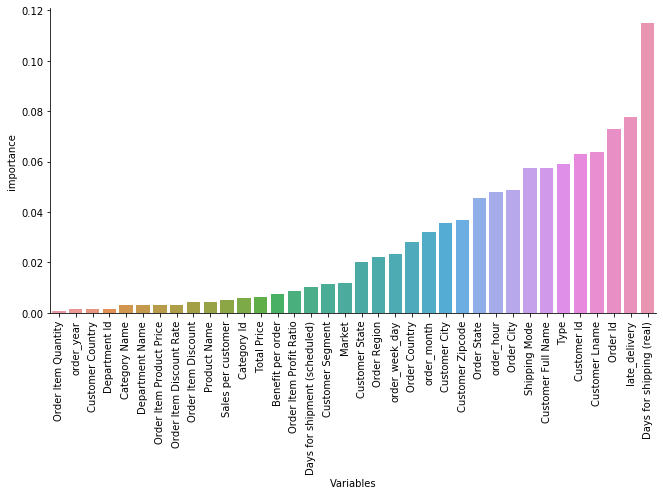

In [33]:
# 对于fruad模型的重要特征可视化
fraud_fea_importance = pd.DataFrame({'Variables':x_fraud.columns[fraud_important_col],
                                     'importance':best_model_fraud.feature_importances_[fraud_important_col]})
print(fraud_fea_importance)
plt.figure(figsize =(20,10))
sns.catplot(x= 'Variables',y = 'importance',data = fraud_fea_importance,aspect =2,kind = 'bar')
plt.xticks(rotation = 90)
plt.show()

分析结论：1.fraud预测的最佳模型为决策树模型；2.fraud相关性最重要的特征为：Days for shipping (real)

In [34]:
# 得到late delivery的最佳预测模型
df_late_stats = pd.DataFrame.from_dict(late_stats,orient = 'index',columns = ['accuracy','recall','f1'])
df_late_stats['model'] = df_late_stats.index
print(df_late_stats)
# # 取f1值作为模型评价指标
best_model_late = df_fraud_stats.sort_values(by = 'f1',ascending = False)['model'].iloc[0]
print('late预测模型f1值最优的为',best_model_late)

                              accuracy    recall        f1  \
LogisticRegression()          0.988755  1.000000  0.989774   
GaussianNB()                  0.566585  1.000000  0.715201   
LinearSVC()                   0.988755  1.000000  0.989774   
KNeighborsClassifier()        0.854808  0.868333  0.866833   
LinearDiscriminantAnalysis()  0.984655  0.994707  0.986025   
DecisionTreeClassifier()      0.993076  0.992824  0.993633   
RandomForestClassifier()      0.992632  1.000000  0.993276   
 XGBClassifier()              0.992355  0.999949  0.993025   

                                                     model  
LogisticRegression()                  LogisticRegression()  
GaussianNB()                                  GaussianNB()  
LinearSVC()                                    LinearSVC()  
KNeighborsClassifier()              KNeighborsClassifier()  
LinearDiscriminantAnalysis()  LinearDiscriminantAnalysis()  
DecisionTreeClassifier()          DecisionTreeClassifier()  
RandomForestCl

In [35]:
# 决策树模型
best_model_late = DecisionTreeClassifier()
best_model_late.fit(x_late_train,y_late_train)

DecisionTreeClassifier()

In [36]:
# 根据决策树模型，得到feature_importance
late_important_col = best_model_late.feature_importances_.argsort()
print(late_important_col)

[24 14 15  5 27  6 30 21  8 22 20 23  3 34  4 16 11 12 31 32 25 18  7 13
 33 26  0 10 17 29 19  9  2 35 28  1]


<Figure size 1440x720 with 0 Axes>

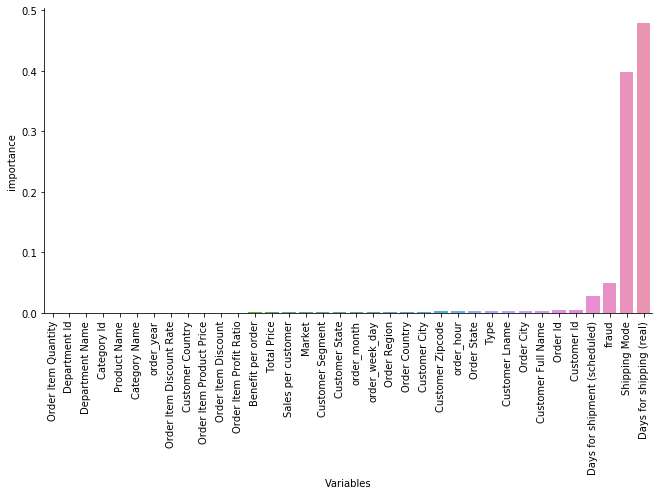

In [37]:
# 对于late delivery重要特征可视化
late_fea_importance = pd.DataFrame({'Variables':x_late.columns[late_important_col],
                                    'importance':best_model_late.feature_importances_[late_important_col]})
plt.figure(figsize = (20,10))
sns.catplot(x = 'Variables',y = 'importance',data = late_fea_importance,kind = 'bar',aspect =2)
plt.xticks(rotation = 90)
plt.show()

In [38]:
late_fea_importance

Variables  importance
0             Order Item Quantity    0.000034
1                   Department Id    0.000096
2                 Department Name    0.000103
3                     Category Id    0.000107
4                    Product Name    0.000118
5                   Category Name    0.000123
6                      order_year    0.000187
7        Order Item Discount Rate    0.000265
8                Customer Country    0.000265
9        Order Item Product Price    0.000269
10            Order Item Discount    0.000438
11        Order Item Profit Ratio    0.000474
12              Benefit per order    0.000587
13                    Total Price    0.000671
14             Sales per customer    0.000705
15                         Market    0.000903
16               Customer Segment    0.001018
17                 Customer State    0.001268
18                    order_month    0.001323
19                 order_week_day    0.001335
20                   Order Region    0.001616
21                  Order Country    0.001823
22                  Customer City    0.002137
23               Customer Zipcode    0.002268
24                     order_hour    0.002396
25                    Order State    0.002534
26                           Type    0.002861
27                 Customer Lname    0.003132
28                     Order City    0.003300
29             Customer Full Name    0.003323
30                       Order Id    0.004921
31                    Customer Id    0.005222
32  Days for shipment (scheduled)    0.028267
33                          fraud    0.048890
34                  Shipping Mode    0.397404
35       Days for shipping (real)    0.479618

分析结论：1.late_delivery预测最佳模型为决策树模型；2.late_delivery相关性最重要的特征为：Days for shipping (real)

In [42]:
# 使用neural network模型
import sys
sys.path.append('E:\Program Files\python\Lib\site-packages')
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# BN,对每个batch数据前一层的激活值据进行batch normalization使输出数据均值为0，方差为1
keras.layers.BatchNormalization()
classifier = Sequential()
# 搭建神经网络
classifier.add(Dense(1024,activation = 'relu',input_dim = x_fraud.shape[1]))
classifier.add(Dense(512,activation = 'relu'))
classifier.add(Dense(256,activation = 'relu'))
classifier.add(Dense(128,activation = 'relu'))
classifier.add(Dense(64,activation = 'relu'))
classifier.add(Dense(32,activation = 'relu'))
classifier.add(Dense(1,activation = 'sigmoid'))
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [65]:
# fraud模型训练
classifier.fit(x_fraud_train,y_fraud_train,batch_size = 1024,epochs =10)

Epoch 1/10
142/142 [==============================] - 6s 40ms/step - loss: 0.2098 - accuracy: 0.9734
Epoch 2/10
142/142 [==============================] - 6s 39ms/step - loss: 0.0418 - accuracy: 0.9866
Epoch 3/10
142/142 [==============================] - 6s 39ms/step - loss: 0.0340 - accuracy: 0.9888
Epoch 4/10
142/142 [==============================] - 6s 40ms/step - loss: 0.0270 - accuracy: 0.9906
Epoch 5/10
142/142 [==============================] - 6s 41ms/step - loss: 0.0218 - accuracy: 0.9926
Epoch 6/10
142/142 [==============================] - 6s 41ms/step - loss: 0.0158 - accuracy: 0.9947
Epoch 7/10
142/142 [==============================] - 6s 41ms/step - loss: 0.0143 - accuracy: 0.9951
Epoch 8/10
142/142 [==============================] - 6s 41ms/step - loss: 0.0100 - accuracy: 0.9966
Epoch 9/10
142/142 [==============================] - 6s 41ms/step - loss: 0.0089 - accuracy: 0.9970
Epoch 10/10
142/142 [==============================] - 6s 41ms/step - loss: 0.0067 - accura

In [44]:
# fraud模型评估
fraud_train_evaluation = classifier.evaluate(x_fraud_train,y_fraud_train)
fraud_test_evaluation = classifier.evaluate(x_fraud_test,y_fraud_test)
print('fraud_train_evaluation:',fraud_train_evaluation)
print('fraud_test_evaluation:',fraud_test_evaluation)

1129/1129 [==============================] - 3s 3ms/step - loss: 0.0529 - accuracy: 0.9830
fraud_train_evaluation: [0.02013057842850685, 0.9914828538894653]
fraud_test_evaluation: [0.05287982523441315, 0.982965886592865]


In [66]:
# fruad模型结果输出
y_fraud_pred_temp = classifier.predict(x_fraud_test,batch_size = 512,verbose =1)
# print(y_fraud_pred_temp)
y_fraud_pred = np.where(y_fraud_pred_temp >= 0.5,1,0)
print('fraud预测的accuracy值：',accuracy_score(y_fraud_test,y_fraud_pred))

71/71 [==============================] - 1s 8ms/step
fraud预测的accuracy值： 0.9881176600930645


In [58]:
# late delivery模型训练
classifier.fit(x_late_train,y_late_train,batch_size = 512,epochs =10)

Epoch 1/10
283/283 [==============================] - 7s 25ms/step - loss: 0.0126 - accuracy: 0.9956
Epoch 2/10
283/283 [==============================] - 7s 24ms/step - loss: 0.0101 - accuracy: 0.9965
Epoch 3/10
283/283 [==============================] - 7s 24ms/step - loss: 0.0083 - accuracy: 0.9971
Epoch 4/10
283/283 [==============================] - 7s 24ms/step - loss: 0.0082 - accuracy: 0.9971
Epoch 5/10
283/283 [==============================] - 7s 25ms/step - loss: 0.0077 - accuracy: 0.9975
Epoch 6/10
283/283 [==============================] - 7s 25ms/step - loss: 0.0047 - accuracy: 0.9984
Epoch 7/10
283/283 [==============================] - 7s 24ms/step - loss: 0.0060 - accuracy: 0.9980
Epoch 8/10
283/283 [==============================] - 7s 25ms/step - loss: 0.0070 - accuracy: 0.9979
Epoch 9/10
283/283 [==============================] - 7s 25ms/step - loss: 0.0040 - accuracy: 0.9987
Epoch 10/10
283/283 [==============================] - 7s 25ms/step - loss: 0.0039 - accura

In [59]:
# late delivery模型评估
late_train_evaluation = classifier.evaluate(x_late_train,y_late_train)
late_test_evaluation = classifier.evaluate(x_late_test,y_late_test)
print('late_train_evaluation:',late_train_evaluation)
print('late_train_evaluation:',late_test_evaluation)

1129/1129 [==============================] - 4s 4ms/step - loss: 0.0455 - accuracy: 0.9916
late_train_evaluation: [0.003358284244313836, 0.9988713264465332]
late_train_evaluation: [0.045487113296985626, 0.9915798902511597]


In [63]:
# late delivery模型输出
y_late_pred_temp = classifier.predict(x_late_test,batch_size = 512,verbose = 1)
y_late_pred = np.where(y_late_pred_temp >= 0.5,1,0)
print('late delivery预测的accuracy：',accuracy_score(y_late_test,y_late_pred))

71/71 [==============================] - 1s 9ms/step
late delivery预测的accuracy： 0.991579880345668


In [67]:
# 保存文件
import pickle

with open('./data_predict.pkl','wb') as file:
    pickle.dump(data,file)